In [21]:
# Imort all the required libraries
import pandas as pd
import requests
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import numpy as np
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [5]:
# Functions

def load_DF(url):
  data = StringIO(requests.get(url).text)
  return pd.read_csv(data)

In [6]:
# Loading Final DataSet
df = load_DF('https://raw.githubusercontent.com/mohannashahrad/Borealis_AI_Plant_Tree_Project/main/Final_Data/final_data.csv')
df = df.iloc[: , 1:]
display(df.head())

,Country,Time,Population,Pop Growth (%),Urban Pop (%),Land Area (m2),Agriculture Land (%),Forest Land (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv)
0,Afghanistan,1990,12412311.0,4.476954,21.177,652860.0,58.266703,1.850994,NaN,NaN,NaN,NaN,NaN,2960.0,15180.0
1,Afghanistan,1991,13299016.0,6.900124,21.266,652860.0,58.251386,1.850994,NaN,NaN,NaN,NaN,NaN,2740.0,15100.0
2,Afghanistan,1992,14485543.0,8.546107,21.355,652860.0,58.251386,1.850994,NaN,NaN,NaN,NaN,NaN,1430.0,13630.0
3,Afghanistan,1993,15816601.0,8.790897,21.444,652860.0,58.104341,1.850994,NaN,NaN,NaN,NaN,NaN,1360.0,13460.0
4,Afghanistan,1994,17075728.0,7.659796,21.534,652860.0,57.919003,1.850994,NaN,NaN,NaN,NaN,NaN,1300.0,13270.0


In [7]:
# One-hot encoding on Country column
discrete_columns = ["Country"]

for var in discrete_columns:
    enc = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(enc.fit_transform(df[[var]]).toarray())
    enc_df.columns = enc.get_feature_names([var])
    df = df.join(enc_df)
    df = df.drop([var], axis=1)

display(df.head())    

,Time,Population,Pop Growth (%),Urban Pop (%),Land Area (m2),Agriculture Land (%),Forest Land (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),...,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Vietnam,Country_Virgin Islands (U.S.),Country_West Bank and Gaza,Country_World,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
0,1990,12412311.0,4.476954,21.177,652860.0,58.266703,1.850994,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1991,13299016.0,6.900124,21.266,652860.0,58.251386,1.850994,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992,14485543.0,8.546107,21.355,652860.0,58.251386,1.850994,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993,15816601.0,8.790897,21.444,652860.0,58.104341,1.850994,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994,17075728.0,7.659796,21.534,652860.0,57.919003,1.850994,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# Splitting data set into train and test
print(df.shape)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
print(df.shape)
x = df.loc[:, df.columns != 'Forest Land (%)']
y = df['Forest Land (%)']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

(8246, 280)
(6251, 280)


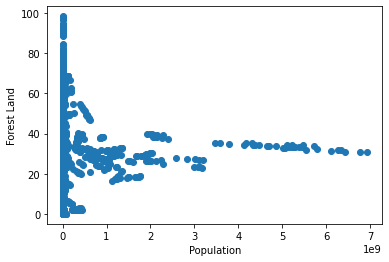

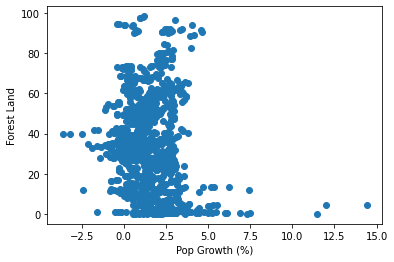

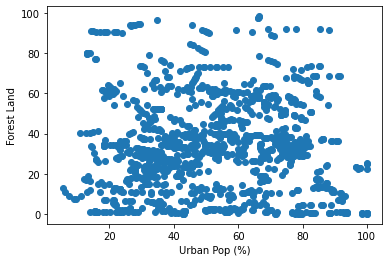

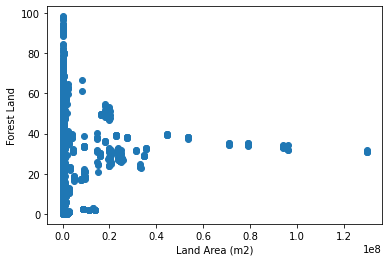

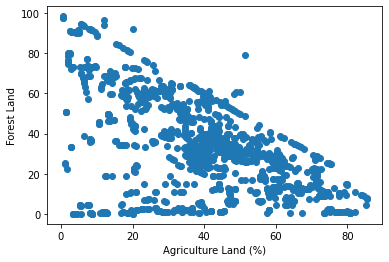

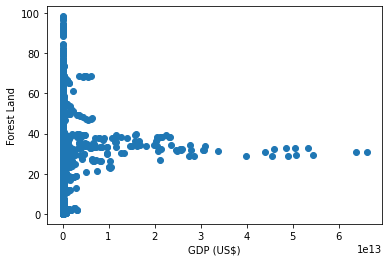

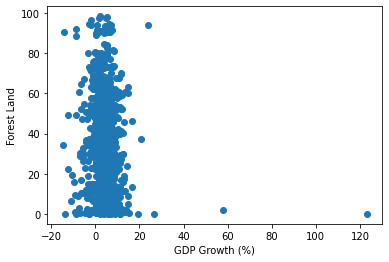

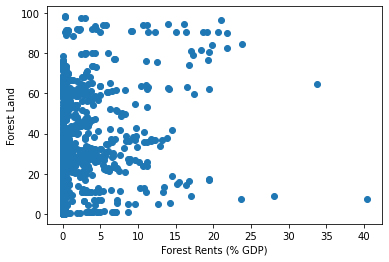

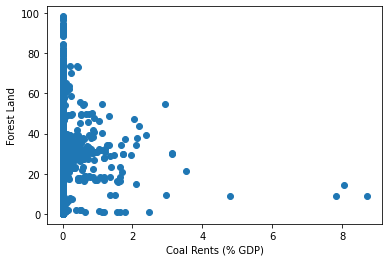

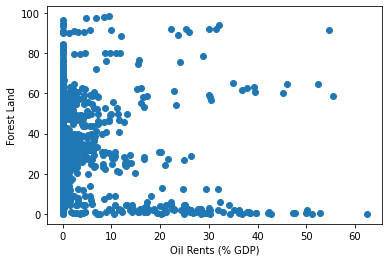

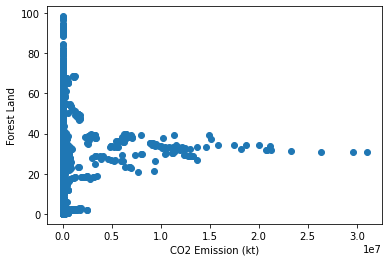

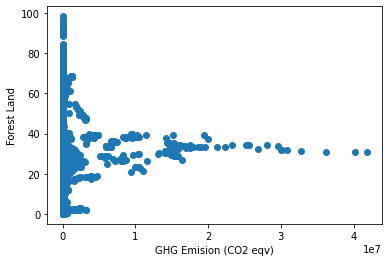

In [104]:
# Plotting 
features = ['Population', 'Pop Growth (%)', 'Urban Pop (%)', 'Land Area (m2)', 'Agriculture Land (%)', 'GDP (US$)', 
            'GDP Growth (%)', 'Forest Rents (% GDP)', 'Coal Rents (% GDP)', 'Oil Rents (% GDP)', 'CO2 Emission (kt)', 'GHG Emision (CO2 eqv)']

for f in features: 
  plt.scatter(X_test[f],y_test)
  plt.xlabel(f)
  plt.ylabel('Forest Land')
  plt.show()

In [105]:
# Training the LR Model

model = LinearRegression()  
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
display(compare_df)

,Actual,Predicted
0,31.021033,32.120773
1,6.309531,7.025079
2,2.549039,1.630963
3,60.105322,58.651414
4,24.825396,23.261180
...,...,...
1246,12.929709,12.146861
1247,49.373648,50.876633
1248,0.454484,1.286559
1249,38.888152,38.921840


In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', np.sqrt(metrics.r2_score(y_pred,y_test)))

Mean Absolute Error: 2.1529766066227207
Mean Squared Error: 11.15279067702687
Root Mean Squared Error: 3.3395794161880428
R2 score: 0.9890752585772231


In [107]:
df.head(20)

,Time,Population,Pop Growth (%),Urban Pop (%),Land Area (m2),Agriculture Land (%),Forest Land (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),...,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Vietnam,Country_Virgin Islands (U.S.),Country_West Bank and Gaza,Country_World,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
13,2003,23680871.0,4.668344,22.353000,6.528600e+05,58.067580,1.850994,4.515559e+09,8.832278,0.664331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2004,24726689.0,4.321560,22.500000,6.528600e+05,58.069111,1.850994,5.226779e+09,1.414118,0.387787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2005,25654274.0,3.682700,22.703000,6.528600e+05,58.067580,1.850994,6.209138e+09,11.229715,0.332205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2006,26433058.0,2.990524,22.907000,6.528600e+05,58.067580,1.850994,6.971286e+09,5.357403,0.454077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,2007,27100542.0,2.493830,23.113000,6.528600e+05,58.067580,1.850994,9.747880e+09,13.826320,0.342749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2008,27722281.0,2.268273,23.320000,6.528600e+05,58.067580,1.850994,1.010923e+10,3.924984,0.353698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2009,28394806.0,2.396978,23.528000,6.528600e+05,58.067580,1.850994,1.243909e+10,21.390528,0.274778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2010,29185511.0,2.746615,23.737000,6.528600e+05,58.069111,1.850994,1.585657e+10,14.362441,0.358436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2011,30117411.0,3.143106,23.948000,6.528600e+05,58.067580,1.850994,1.780429e+10,0.426355,0.309318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2012,31161378.0,3.407600,24.160000,6.528600e+05,58.067580,1.850994,2.000160e+10,12.752287,0.263852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
df_2 = load_DF('https://raw.githubusercontent.com/mohannashahrad/Borealis_AI_Plant_Tree_Project/main/Final_Data/final_data2.csv')
df_2 = df_2.iloc[: , 1:]
df_2 = df_2.loc[:, df_2.columns != 'Country Name']


In [113]:
df_2

,Time,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv),Tree Loss (ha)
0,2001,652860.0,377530.0,12084.4,21606992.0,3.902805,22.169,NaN,NaN,NaN,NaN,NaN,810.0,13490.0,88.092712
1,2002,652860.0,377530.0,12084.4,22600774.0,4.496719,22.261,4.055180e+09,NaN,0.958004,0.004341,0.029101,1100.0,16090.0,178.640364
2,2003,652860.0,379100.0,12084.4,23680871.0,4.668344,22.353,4.515559e+09,8.832278,0.664331,0.007422,0.026686,1350.0,16780.0,244.336255
3,2004,652860.0,379110.0,12084.4,24726689.0,4.321560,22.500,5.226779e+09,1.414118,0.387787,0.016455,0.025399,1130.0,16520.0,201.444959
4,2005,652860.0,379100.0,12084.4,25654274.0,3.682700,22.703,6.209138e+09,11.229715,0.332205,0.010904,0.025973,1640.0,17400.0,235.956834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5634,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1461.499655
5635,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.572059
5636,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.164427
5637,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,970.789805


In [115]:
df_2 = df_2[~df_2.isin([np.nan, np.inf, -np.inf]).any(1)]
x_2 = df_2.loc[:, df_2.columns != 'Tree Loss (ha)']
normalized_x_2=StandardScaler().fit_transform(x_2)
normalized_x_2=pd.DataFrame(data=normalized_x_2, columns=["Time", "Land Area (m2)", "Agriculture Land (m2)", "Forest Land (m2)", "Population", "Pop Growth (%)", "Urban Pop (%)", "GDP (US$)", "GDP Growth (%)", "Forest Rents (% GDP)", "Coal Rents (% GDP)", "Oil Rents (% GDP)", "CO2 Emission (kt)", "GHG Emision (CO2 eqv)"])
normalized_x_2.head()

,Time,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv)
0,-1.246489,-0.053191,0.151565,-0.280729,-0.121892,2.833507,-1.488437,-0.252053,0.966200,-0.325614,-0.195424,-0.367831,-0.225766,-0.238114
1,-1.052590,-0.053191,0.151580,-0.280729,-0.114761,2.540205,-1.481744,-0.251572,-0.476629,-0.391587,-0.185539,-0.367980,-0.226046,-0.238385
2,-0.858692,-0.053191,0.151565,-0.280729,-0.108437,1.999872,-1.472501,-0.250907,1.432500,-0.404847,-0.191614,-0.367914,-0.225396,-0.237467
3,-0.664794,-0.053191,0.151565,-0.280729,-0.103127,1.414446,-1.463213,-0.250391,0.290338,-0.375773,-0.191342,-0.368358,-0.225013,-0.233669
4,-0.470896,-0.053191,0.151565,-0.280729,-0.098576,0.994354,-1.453834,-0.248513,1.937539,-0.402332,-0.119929,-0.369223,-0.224477,-0.229663


In [267]:
y_2 = df_2['Tree Loss (ha)']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(normalized_x_2, y_2, test_size=0.2, random_state=0)
model.fit(X_train_2, y_train_2) 
y_pred_2 = model.predict(X_test_2)
compare_df_2 = pd.DataFrame({'Actual': y_test_2.to_numpy().flatten(), 'Predicted': y_pred_2.flatten()})
compare_df_2

,Actual,Predicted
0,16356.445450,-19369.272140
1,57883.220930,119624.452379
2,902.670348,32988.499845
3,99820.579630,91718.667734
4,49140.154900,129571.566025
...,...,...
569,6660.339483,-5975.209666
570,7730.473436,-12301.133616
571,253840.008700,298830.025226
572,2238.446401,58041.842613


In [117]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, y_pred_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))

Mean Absolute Error: 65327.08649383911
Mean Squared Error: 20612051032.481762
Root Mean Squared Error: 143568.97656695114


In [118]:
print('R2 score:', metrics.r2_score(y_pred_2,y_test_2))

R2 score: 0.8564230897589762


In [119]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(normalized_x_2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

In [120]:
finalDf = pd.concat([principalDf, df_2['Tree Loss (ha)']], axis = 1)

In [121]:
finalDf

,principal component 1,Tree Loss (ha)
0,-0.684088,NaN
1,-0.674442,NaN
2,-0.605725,244.336255
3,-0.579369,201.444959
4,-0.512815,235.956834
...,...,...
5313,NaN,9644.693979
5314,NaN,12261.738760
5315,NaN,10955.480630
5316,NaN,25978.304550


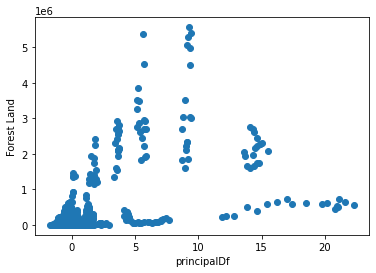

In [122]:
plt.scatter(principalDf,df_2['Tree Loss (ha)'])
plt.xlabel('principalDf')
plt.ylabel('Forest Land')
plt.show()

In [257]:
normalized_x_3 = normalized_x_2.loc[:, normalized_x_2.columns != 'Oil Rents (% GDP)']
#normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'Land Area (m2)']
normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'Agriculture Land (m2)']
#normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'Forest Land (m2)']
normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'Population']
normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'Pop Growth (%)']
normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'Urban Pop (%)']
normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'GDP (US$)']
normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'GDP Growth (%)']
normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'CO2 Emission (kt)']
normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'Forest Rents (% GDP)']
normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'Coal Rents (% GDP)']
normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'GHG Emision (CO2 eqv)']
normalized_x_3 = normalized_x_3.loc[:, normalized_x_3.columns != 'Time']
normalized_x_3.head(10)

,Land Area (m2),Forest Land (m2)
0,-0.053191,-0.280729
1,-0.053191,-0.280729
2,-0.053191,-0.280729
3,-0.053191,-0.280729
4,-0.053191,-0.280729
5,-0.053191,-0.280729
6,-0.053191,-0.280729
7,-0.053191,-0.280729
8,-0.053191,-0.280729
9,-0.053191,-0.280729


In [258]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(normalized_x_3, y_2, test_size=0.2, random_state=0)
model.fit(X_train_3, y_train_3) 
y_pred_3 = model.predict(X_test_3)
compare_df_3 = pd.DataFrame({'Actual': y_test_3.to_numpy().flatten(), 'Predicted': y_pred_3.flatten()})
compare_df_3

,Actual,Predicted
0,16356.445450,36667.625559
1,57883.220930,115022.972495
2,902.670348,7348.880725
3,99820.579630,101442.542404
4,49140.154900,114188.794729
...,...,...
569,6660.339483,10530.674364
570,7730.473436,18228.883111
571,253840.008700,317851.779983
572,2238.446401,23075.644784


In [259]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_3, y_pred_3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, y_pred_3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_3, y_pred_3)))

Mean Absolute Error: 62461.540066137495
Mean Squared Error: 26681189152.93765
Root Mean Squared Error: 163343.77598469323


In [260]:
print('R2 score:', metrics.r2_score(y_pred_3,y_test_3))

R2 score: 0.8023986502371421


In [261]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(normalized_x_3)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

In [262]:
finalDf = pd.concat([principalDf, df_2['Tree Loss (ha)']], axis = 1)

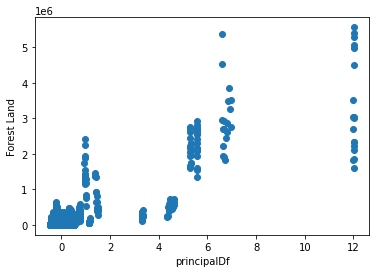

In [263]:
plt.scatter(principalDf,df_2['Tree Loss (ha)'])
plt.xlabel('principalDf')
plt.ylabel('Forest Land')
plt.show()

### Most important features:

Forest Land (m2)

Land Area (m2)

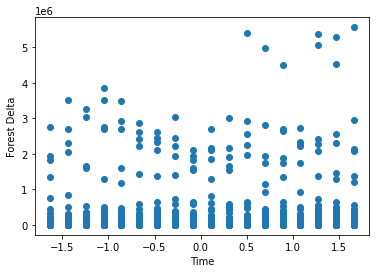

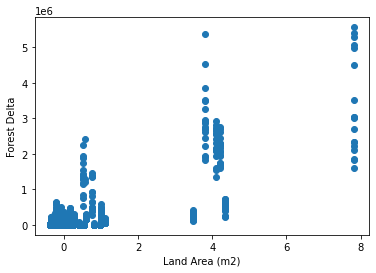

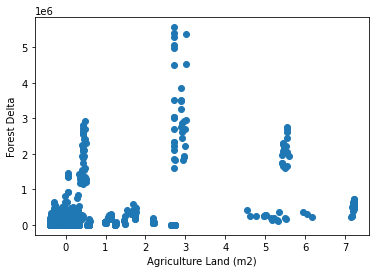

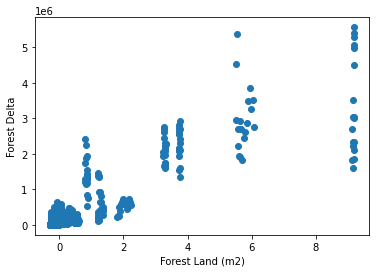

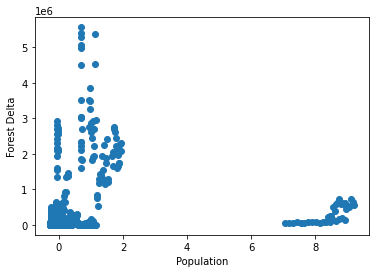

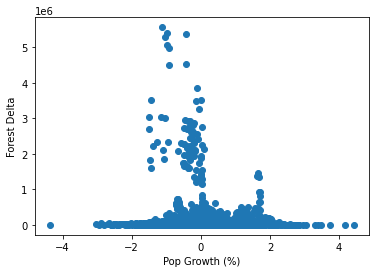

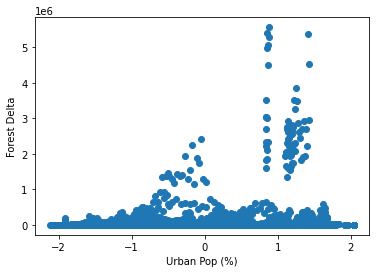

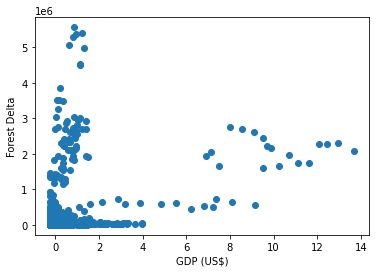

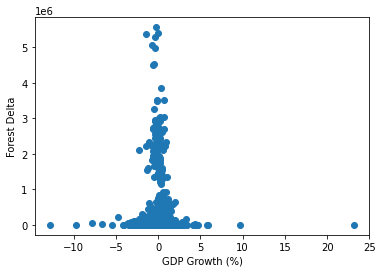

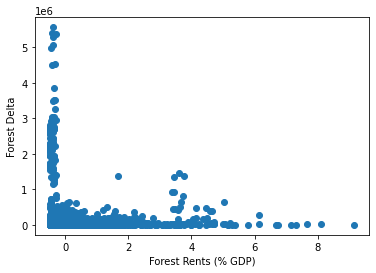

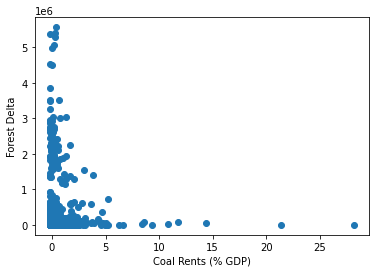

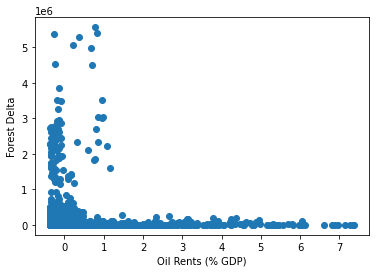

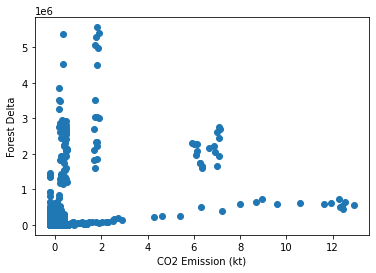

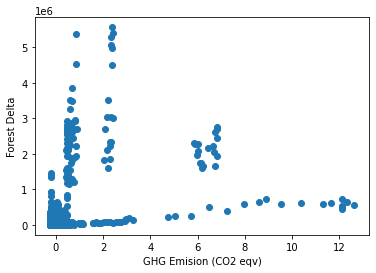

In [272]:
for f in normalized_x_2.columns: 
  plt.scatter(normalized_x_2[f], y_2)
  plt.xlabel(f)
  plt.ylabel('Forest Delta')
  plt.show()

# PCA for Feature Selection

In [27]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df_np = StandardScaler().fit_transform(df)
df = pd.DataFrame(data=df_np, columns=df.columns)
x = df.loc[:, df.columns != 'Tree Loss (ha)']
df.head()

,Time,Population,Pop Growth (%),Urban Pop (%),Land Area (m2),Agriculture Land (%),Forest Land (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),...,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Vietnam,Country_Virgin Islands (U.S.),Country_West Bank and Gaza,Country_World,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
0,-0.178214,-0.324690,2.297415,-1.390500,-0.341678,0.988861,-1.389385,-0.280070,0.929818,-0.327807,...,-0.065864,-0.068271,-0.063367,-0.068271,0.0,0.0,-0.065864,-0.067078,-0.068271,-0.068271
1,-0.056596,-0.323515,2.043204,-1.383795,-0.341678,0.988939,-1.389385,-0.279958,-0.425272,-0.397393,...,-0.065864,-0.068271,-0.063367,-0.068271,0.0,0.0,-0.065864,-0.067078,-0.068271,-0.068271
2,0.065021,-0.322474,1.574886,-1.374536,-0.341678,0.988861,-1.389385,-0.279803,1.367762,-0.411379,...,-0.065864,-0.068271,-0.063367,-0.068271,0.0,0.0,-0.065864,-0.067078,-0.068271,-0.068271
3,0.186638,-0.321599,1.067485,-1.365231,-0.341678,0.988861,-1.389385,-0.279682,0.295055,-0.380713,...,-0.065864,-0.068271,-0.063367,-0.068271,0.0,0.0,-0.065864,-0.067078,-0.068271,-0.068271
4,0.308255,-0.320850,0.703383,-1.355835,-0.341678,0.988861,-1.389385,-0.279244,1.842089,-0.408726,...,-0.065864,-0.068271,-0.063367,-0.068271,0.0,0.0,-0.065864,-0.067078,-0.068271,-0.068271


In [28]:
y = df['Forest Land (%)']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
model = LinearRegression()  
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
display(compare_df)

,Actual,Predicted
0,-0.075719,-0.075719
1,-1.188595,-1.188595
2,-1.357948,-1.357948
3,1.234085,1.234085
4,-0.354738,-0.354738
...,...,...
1246,-0.890457,-0.890457
1247,0.750787,0.750787
1248,-1.452276,-1.452276
1249,0.278575,0.278575


In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', np.sqrt(metrics.r2_score(y_pred,y_test)))

Mean Absolute Error: 0.00042035251099467033
Mean Squared Error: 0.00022104698810456605
Root Mean Squared Error: 0.014867649044303072
R2 score: 0.9998974529892553


In [33]:
pca = PCA()
x_new = pca.fit_transform(x)

In [42]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

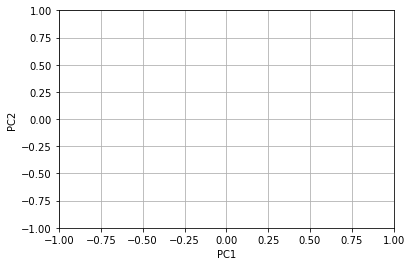

In [43]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

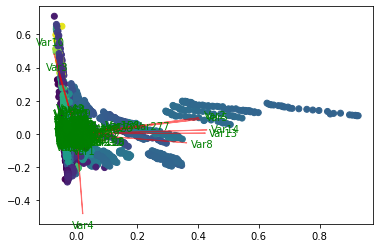

In [44]:
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [50]:
print(abs( pca.components_ ))

[[2.06963623e-02 3.97746133e-01 5.65821444e-02 ... 1.14536644e-02
  1.25869732e-02 8.69047569e-03]
 [8.97214349e-02 9.54870900e-02 3.52239126e-01 ... 1.94652662e-02
  5.53797022e-02 1.85246838e-02]
 [1.99674164e-02 3.11138099e-02 2.26247645e-02 ... 3.76378243e-02
  3.27231669e-02 9.70411095e-03]
 ...
 [0.00000000e+00 1.89777704e-31 7.32613397e-32 ... 1.01245752e-28
  7.20755234e-18 1.44131166e-18]
 [0.00000000e+00 1.92944344e-17 4.90720676e-17 ... 2.15017334e-04
  2.18805663e-04 2.18805663e-04]
 [0.00000000e+00 3.94430453e-31 1.52119438e-31 ... 2.25179729e-29
  6.41385354e-17 4.78047687e-17]]


In [47]:
print(sum(abs( pca.components_ ))[0:10])

[2.59190856 2.90986667 2.83948604 3.1091473  3.14688761 2.97676553
 3.12372146 3.21846895 2.66297411 3.12532181]
